In [1]:
!pip install -U finance-datareader
# 주가 불러오는 라이브러리
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 3.8/3.8 MB 2.8 MB/s eta 0:00:00


In [2]:
# 삼성전자 종목에 대한 데이터를 2018년 5월 4일부터 2020년 1월 22일까지 로드
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')

In [3]:
df.shape

(421, 6)

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [5]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

In [6]:
dfx.describe()

,Open,High,Low,Volume
count,421.000000,421.000000,421.000000,421.000000
mean,0.372409,0.374434,0.373457,0.117439
std,0.175834,0.171931,0.171432,0.084973
min,0.000000,0.000000,0.000000,0.000000
25%,0.262729,0.267857,0.269618,0.064016
50%,0.350305,0.349206,0.352113,0.101418
75%,0.443992,0.452381,0.444668,0.146095
max,1.000000,1.000000,1.000000,1.000000


In [7]:
dfy.head()

,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [8]:
X = dfx.values.tolist()
y = dfy.values.tolist()
# 리스트 형태로 저장

In [9]:
window_size = 10
# 이전 10일까지의 주가로 다음날의 종가를 예측

In [10]:
data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)

In [11]:
# 10일간의 OHLVC 데이터
data_X[0]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015],
 [0.5519348268816622,
  0.5357142857121598,
  0.5251509054304823,
  0.17775773908379244],
 [0.5193482688369884,
  0.5079365079344923,
  0.4929577464768895,
  0.24207018961868487],
 [0.47861507128114616,
  0.49999999999801586,
  0.49496981891148906,
  0.19484190950809502],
 [0.5234215885925726,
  0.5119047619027305,
  0.5050301810844868,
  0.100853881024588],
 [0.5071283095702357,
  0.4880952380933012,
  0.5030181086498873,
  0.03892790771899896]]

In [13]:
data_y[0]

[0.503006012022032]

In [14]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))


전체 데이터의 크기 : 411 411


In [15]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])
# 훈련/테스트 데이터 분리

In [16]:
print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


In [18]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 1.7 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     -------------------------------------- 440.8/440.8 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 2.7 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 3.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.3.1 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.3 which is incompatible.
mysql-connector-python 8.0.30 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.24.3 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# lstm 불러오기

In [20]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1)) # 10% 삭제
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)
# loss 값 줄이기

Epoch 1/70
10/10 [==============================] - 6s 26ms/step - loss: 0.0621
Epoch 2/70
10/10 [==============================] - 0s 40ms/step - loss: 0.0228
Epoch 3/70
10/10 [==============================] - 0s 17ms/step - loss: 0.0073
Epoch 4/70
10/10 [==============================] - 0s 18ms/step - loss: 0.0074
Epoch 5/70
10/10 [==============================] - 0s 16ms/step - loss: 0.0054
Epoch 6/70
10/10 [==============================] - 0s 17ms/step - loss: 0.0052
Epoch 7/70
10/10 [==============================] - 0s 15ms/step - loss: 0.0054
Epoch 8/70
10/10 [==============================] - 0s 18ms/step - loss: 0.0052
Epoch 9/70
10/10 [==============================] - 0s 26ms/step - loss: 0.0050
Epoch 10/70
10/10 [==============================] - 0s 16ms/step - loss: 0.0047
Epoch 11/70
10/10 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 12/70
10/10 [==============================] - 0s 19ms/step - loss: 0.0047
Epoch 13/70
10/10 [==================

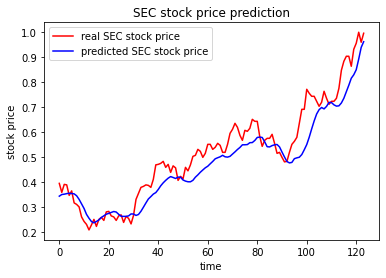

Tomorrow's SEC price : [60177.58] KRW


In [22]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')